# Getting started with TimeSeries

In [29]:
# relevant imports
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from ptsa.data.TimeSeriesX import TimeSeriesX as timeseries

## 1. Start with creating some data

In [17]:
# Number of data points our timeseries contains.
num_points = 5000

# specify the samping rate, in Hz. 10 Hz indicate 10 samples per second
sample_rate = 10.

# create the time points
t = np.linspace(0, 1, num_points) / sample_rate

# our data is a sin function at a given frequency with added noise
frequency = 20.
data1 = np.sin(2*np.pi*frequency*t) + np.random.uniform(-0.1, 0.1, num_points)
data2 = np.cos(2*np.pi*frequency*t) + np.random.uniform(-0.1, 0.1, num_points)

### Visualize the time series

<IPython.core.display.Javascript object>


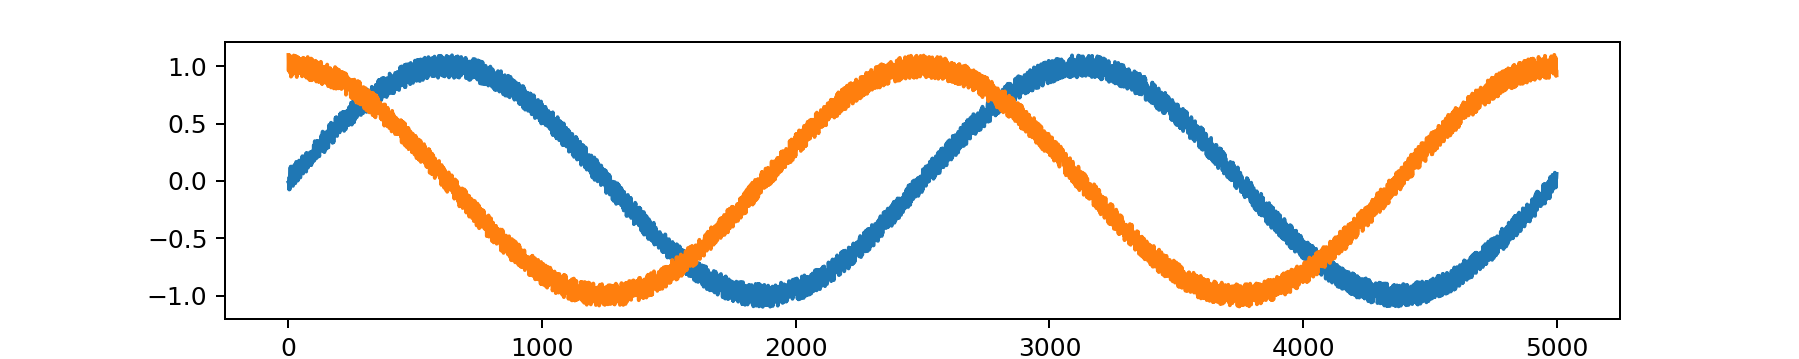

In [18]:
plt.figure(figsize=[10,2])
plt.plot(data1)
plt.plot(data2)

<IPython.core.display.Javascript object>


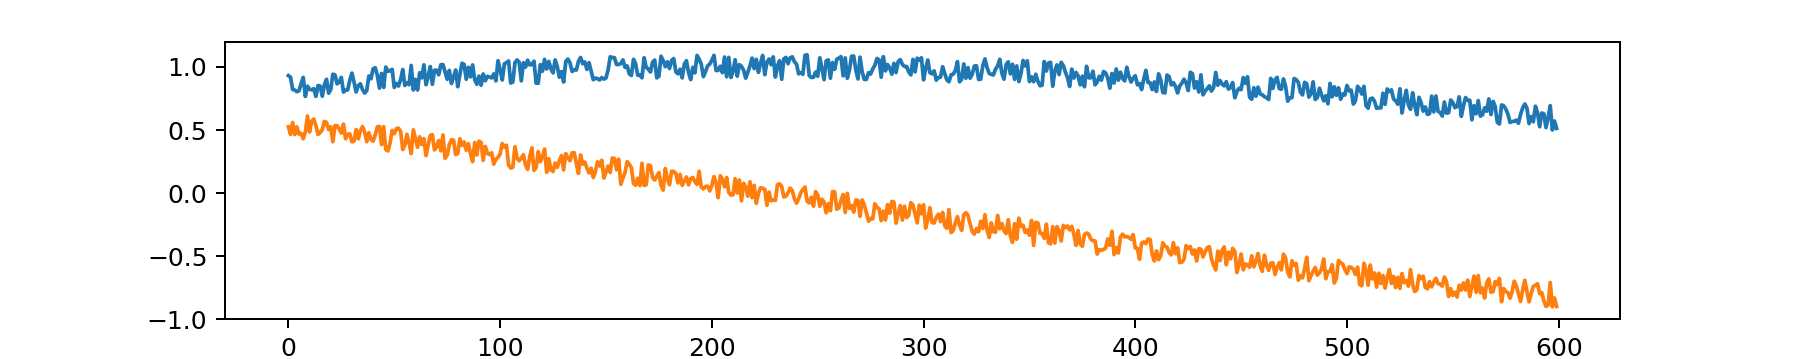

In [19]:
# zoom in
plt.figure(figsize=[10, 2])
plt.plot(data1[400:1000])
plt.plot(data2[400:1000])

## 2. Create a TimeSeries object

<IPython.core.display.Javascript object>


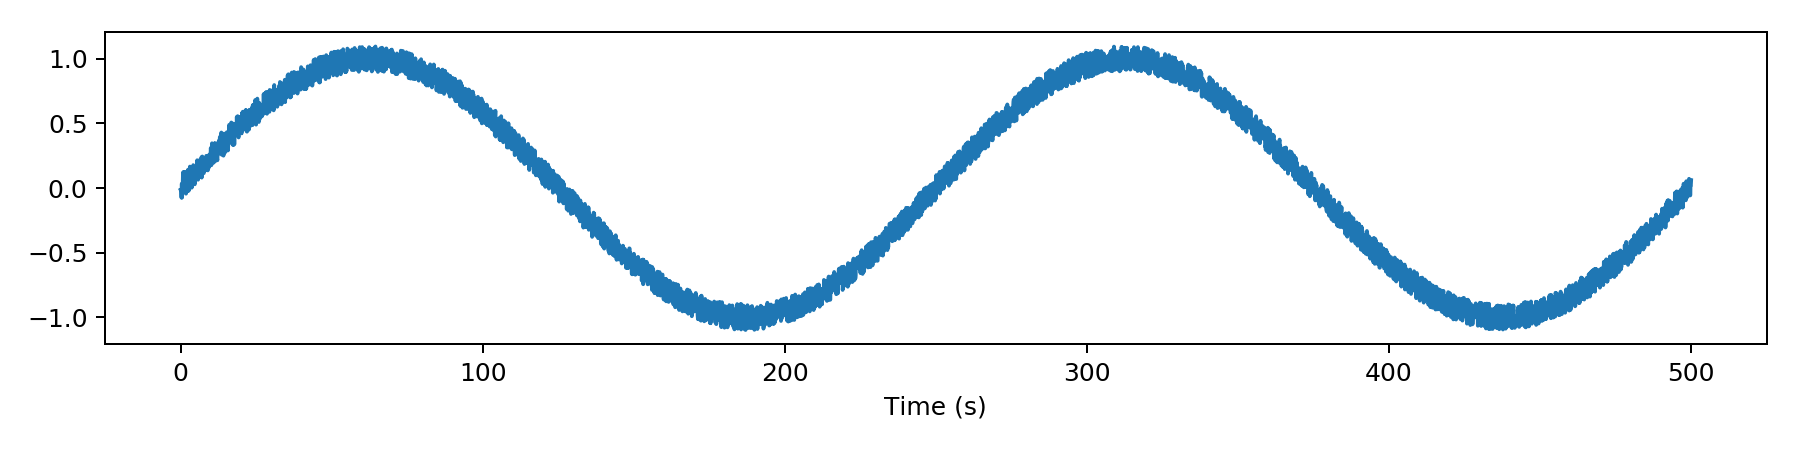

In [30]:
# When using real data, the sampling rate and time would be what are approprite with respect to your data.
# For demonstration purposes we created some data. We need to also specify the time dimension.
# We have previously set the sample_rate to 10. Hz. This means that every second contains 10 samples.
# Since we have 5000 datapoints, our timeseries is 500s long.
# So let's create the time marks of the data.
t = np.linspace(0, num_points, num_points) / sample_rate

# We can modify the x-axis to indicate the correct time.
plt.figure(figsize=[10,2.5])
plt.plot(t, data1)
plt.xlabel('Time (s)')
plt.tight_layout()

In [31]:
# Let's stack the two time-series data arrays and construct our timeseries object
# samplerate must be specified in the coordinates.
data = np.vstack((data1, data2))

# Constructing the timeseries object
ts = timeseries(data,
                dims=('data', 'time'),
                coords={'data':['data1', 'data2'],
                        'time':t,
                        'samplerate':sample_rate})
print ts

<xarray.TimeSeriesX (data: 2, time: 5000)>
array([[-0.012879, -0.017388, -0.015391, ...,  0.019794,  0.020518,  0.060638],
       [ 1.09865 ,  0.960677,  1.047597, ...,  0.916695,  0.966169,  0.920927]])
Coordinates:
    samplerate  float64 10.0
  * data        (data) |S5 'data1' 'data2'
  * time        (time) float64 0.0 0.1 0.2 0.3001 0.4001 0.5001 0.6001 ...


In [27]:
# The values of the timeseries object is a multi-dimensional array
print ts.values.shape

(2, 5000)


In [32]:
# to see the coordinates of the timeseries
print ts.coords

Coordinates:
    samplerate  float64 10.0
  * data        (data) |S5 'data1' 'data2'
  * time        (time) float64 0.0 0.1 0.2 0.3001 0.4001 0.5001 0.6001 ...


## 3. Saving and loading your data

#### timeseries objects can be easily saved and loaded in HDF5 format.

In [34]:
# timeseries object can be easily saved
fname = 'my_ts_data.h5'
ts.to_hdf(fname)

In [37]:
ts = timeseries.from_hdf(fname)
print ts

<xarray.TimeSeriesX (data: 2, time: 5000)>
array([[-0.012879, -0.017388, -0.015391, ...,  0.019794,  0.020518,  0.060638],
       [ 1.09865 ,  0.960677,  1.047597, ...,  0.916695,  0.966169,  0.920927]])
Coordinates:
    samplerate  float64 10.0
  * data        (data) |S5 'data1' 'data2'
  * time        (time) float64 0.0 0.1 0.2 0.3001 0.4001 0.5001 0.6001 ...


## 4. Indexing your data

#### we can used the .sel() function to select partial data by the coordinates.

In [40]:
# We can select the data from 100s to 200s
ts.sel(time=(ts.time>100)&(ts.time<200))

<xarray.TimeSeriesX (data: 2, time: 1000)>
array([[ 0.669011,  0.528994,  0.511695, ..., -0.94273 , -0.950643, -0.862664],
       [-0.741757, -0.742261, -0.86481 , ...,  0.212616,  0.348493,  0.217487]])
Coordinates:
    samplerate  float64 10.0
  * data        (data) |S5 'data1' 'data2'
  * time        (time) float64 100.0 100.1 100.2 100.3 100.4 100.5 100.6 ...

## 5. Resampling your data

#### We can resample the data to a specific samplerate.

In [54]:
original = ts.sel(data='data1').sel(time=ts.time<20.0)
downsampled = original.resampled(resampled_rate=2.0)

<IPython.core.display.Javascript object>


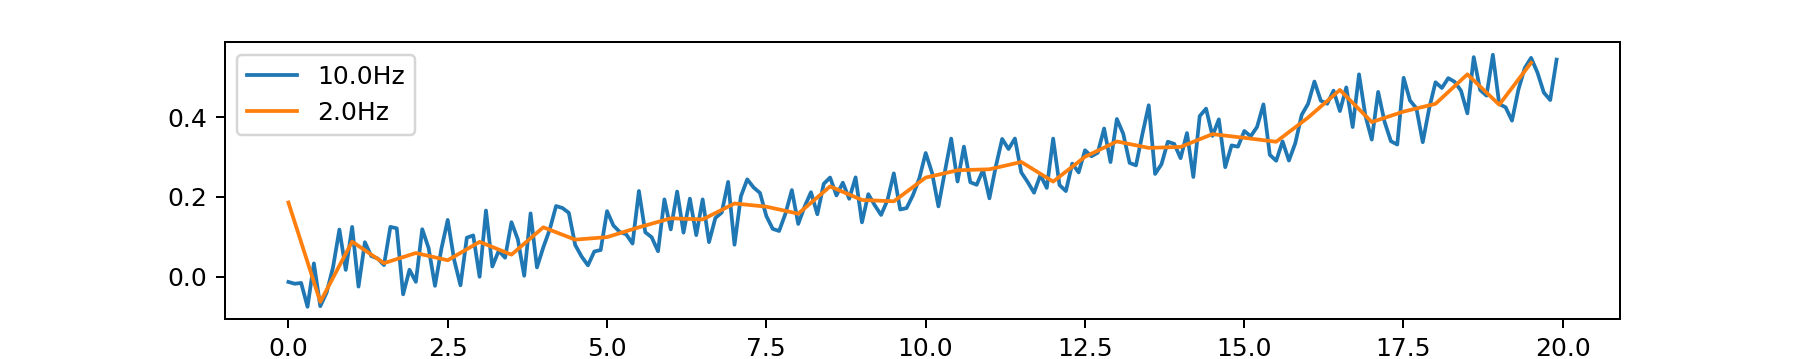

In [55]:
plt.figure(figsize=[10, 2])
plt.plot(original.time, original, label='10.0Hz')
plt.plot(downsampled.time, downsampled, label='2.0Hz')
plt.legend()